<a href="https://colab.research.google.com/github/priscilacc17/PRACTICAS_QUIMICA/blob/main/PC_2_Quimica_CarrascalCastroMariaPriscila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{UNMSM | Química}$$
$$\large \textbf{PC Nº2 | Materia y clasificación}$$

_Profesor: Jesus Alvarado Huayhuaz_

Todas las indicaciones para la presentación de la práctica son explicadas en clase y brindadas en el material de enunciado de preguntas en formato PDF.

## Pregunta 1: DataFrames y listas en python (4 puntos)

Usando PeriodicTable, crea una tabla con 20 elementos químicos y en las columnas considera: nombre, simbolo, masa_atomica, numero_atomico	y valencias. Puedes ayudarte del siguiente [material](https://github.com/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb).

In [ ]:
!pip install rdkit

In [ ]:
!pip install pandas

In [ ]:
from rdkit import Chem
import pandas as pd
PeriodicTable = Chem.GetPeriodicTable()

element_symbols = []

for i in range(1,21):
  element_symbols.append(PeriodicTable.GetElementSymbol(i))

masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
numero_atomico = [PeriodicTable.GetAtomicNumber(x) for x in element_symbols]
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
nombre_del_elemento = [PeriodicTable.GetElementName(x) for x in range(1,21)]
valencias = [PeriodicTable.GetValenceList(x) for x in range(1,21)]

data = {'Nombre': nombre_del_elemento, 'Simbolo': element_symbols,
        'Masa_atomica': masa_atomica, 'Numero_atomico': numero_atomico,
        'Valencias': valencias}
df = pd.DataFrame(data)

print(df)

## Pregunta 2: Configuración electrónica (4 puntos)

Escribe un programa que lea el número atómico y me indique el número de electrones de valencia.

In [ ]:
try:
    numero_atomico = int(input("Ingrese el número atómico del elemento: "))

    nivel = 1
    electrones_contados = 0

    while electrones_contados < numero_atomico:
        if nivel == 1:
            electrones_nivel = 2
        elif nivel == 2:
            electrones_nivel = 8
        else:
            electrones_nivel = 18

        electrones_contados += electrones_nivel

        if electrones_contados >= numero_atomico:
            break

        nivel += 1

    electrones_valencia = numero_atomico - (electrones_contados - electrones_nivel)

    print(f"Los electrones de valencia del elemento con número atómico {numero_atomico} pertenecen al nivel de energía {nivel}.")
    print(f"El número de electrones de valencia es {electrones_valencia}.")
except ValueError:
    print("Por favor, ingrese un número atómico válido.")

# Pregunta 3: Molecularidad & compuestos covalentes (4 puntos)

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

Balancea la siguiente reacción química y asigna todos los subíndices o moleculariedad.

In [ ]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CC=CC.O=O>>C(=O)=O.O…

In [ ]:
!pip install ChemPy

In [ ]:
from chempy import balance_stoichiometry

reactivos, productos = balance_stoichiometry({'C4H8','O2'},{'CO2','H2O'})
coeficientes_reactivos = list(reactivos.values())
coeficientes_productos = list(productos.values())
print("Ecuación balanceada con ChemPy: ",coeficientes_reactivos[0]," C4H8 + ",coeficientes_reactivos[1]," O2 = ",coeficientes_productos[0]," CO2 + ",
coeficientes_productos[1]," H2O")

print("Molecularidad: ",coeficientes_reactivos[0]+coeficientes_reactivos[1])

## Pregunta 4: SMILES, RDKit y Open Babel (4 puntos)

Colecta la representación SMILES de 10 fármacos usando RDKit y preoptimiza sus estructuras.

In [ ]:
#EN 2D
from rdkit import Chem
from rdkit.Chem import Draw

nombres_farmacos = ["Ibuprofeno", "Paracetamol", "Aspirina", "Lisinopril", "Metformina",
                    "Atorvastatina", "Omeprazol", "Warfarina", "Levothyroxine", "Atenolol"]

farmacos = ['CC(C)Cc1ccc(cc1)C(C)C(=O)O',
'CC(=O)NC1=CC=C(C=C1)O',
'CC(=O)OC1=CC=CC=C1C(=O)O',
'CC(C)NCC(O)CCOC(=O)C',
'CN(C)C=O',
'CC(C)C(=O)NC(CC1=CC=C(C=C1)O)C2=CC=CC=C2C(=O)O',
'CC1=CNC2=C1C(=CC=C2)C(=O)O',
'CC(=O)OC1=CC=CC=C1C2=CC=CC=C2C(=O)O',
'CC(C)N(C)C(=O)C1=CC=CC=C1',
'CC(C)NCC(C1=CC=CC=C1O)O']

mol_lista = []

for i in farmacos:
  mol = Chem.MolFromSmiles(i)
  mol_lista.append(mol)
Draw.MolsToGridImage(mol_lista)

In [ ]:
#EN 3D

In [ ]:
!apt-get -qq install -y openbabel

In [ ]:
!obabel -i smi farmacos.smi -o sdf --gen3D > output.sdf

In [ ]:
!obabel -i sdf output.sdf -o mol2 -O _.mol2 -h -m

In [ ]:
!obabel *.mol2 -O opt.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m

In [ ]:
#Resultados:

In [ ]:
#1 IBUPROFENO:

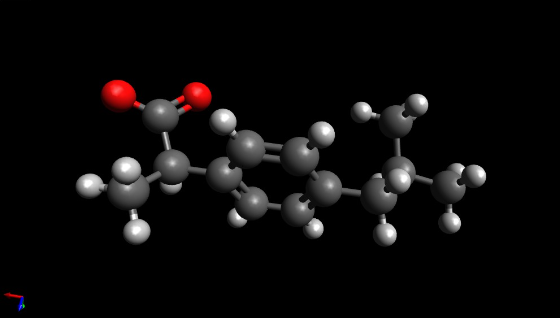

In [ ]:
#2 PARACETAMOL

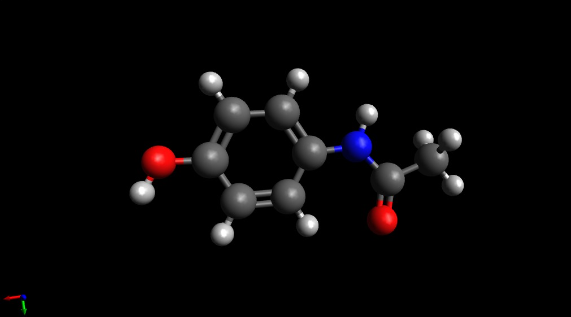

In [ ]:
#3 ASPIRINA

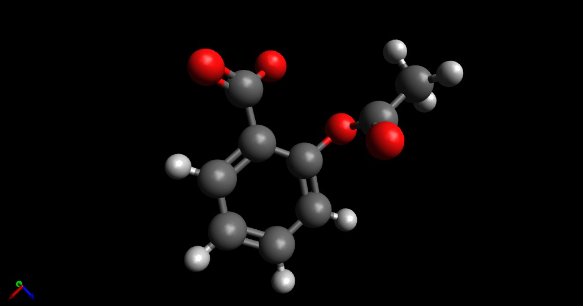

In [ ]:
#4 LISINOPRIL

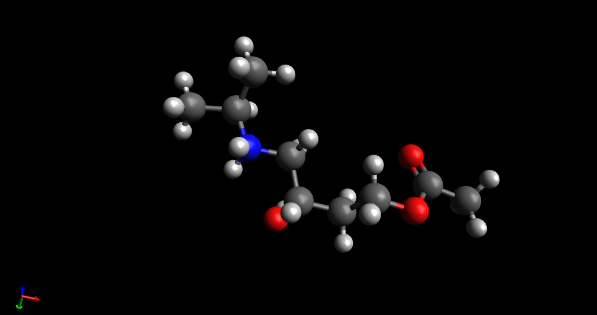

In [ ]:
#5 METMORFINA

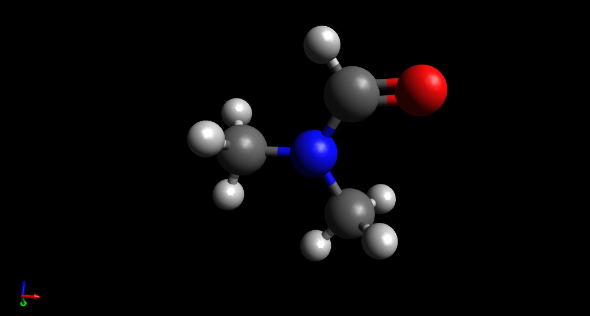

In [ ]:
#6 ATORVASTATINA

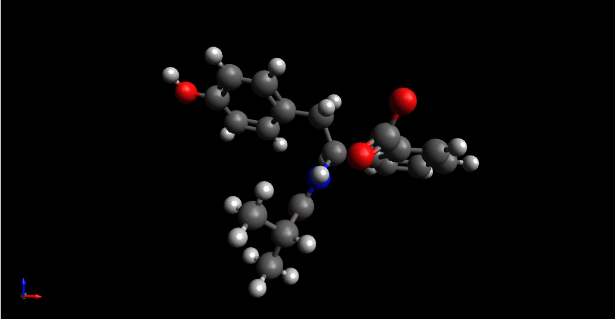

In [ ]:
#7 OMEPRAZOL

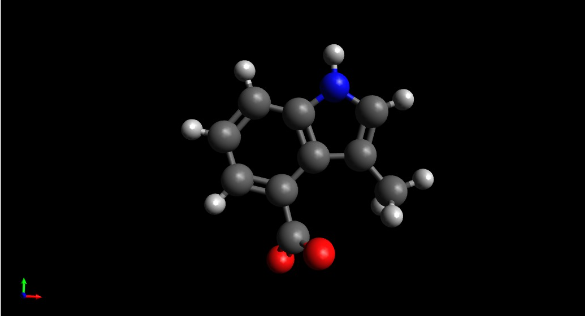

In [ ]:
#8 WARFARINA

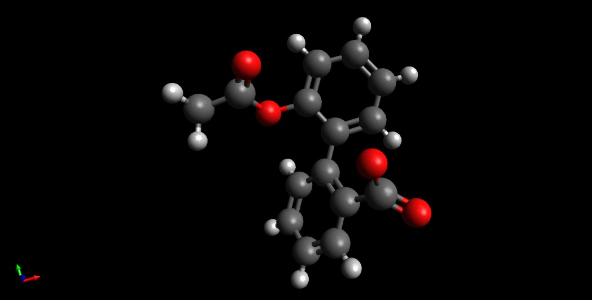

In [ ]:
#9 LEVOTIROXINA

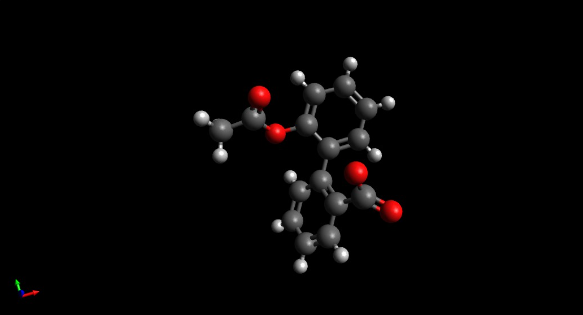

In [ ]:
#10 ATENOLOL

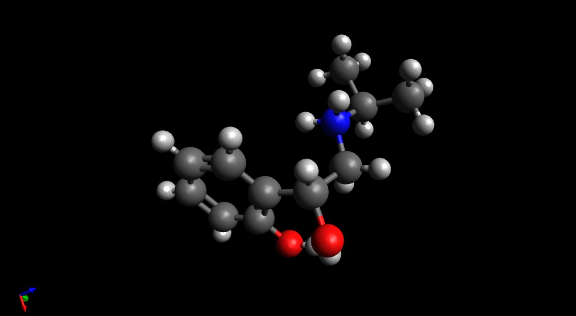

## Pregunta 5: Método científico (4 puntos)

Leer el artículo disponibilizado por el profesor y explica cómo es aplicado el método científico. Emplea como máximo 300 palabras.

El método científico es un enfoque sistemático para comprender el mundo natural a través de la observación, la experimentación y el análisis. En el artículo se aplica el método científico de varias maneras para evaluar la eficacia del modelo didáctico que utiliza cartones de huevos y pelotas de ping-pong para enseñar los principios de Aufbau y Hund.

Primero, los autores realizaron una revisión de la literatura para identificar las brechas en los métodos de enseñanza tradicionales y los beneficios potenciales de utilizar un enfoque práctico. Este paso es crucial en el método científico, ya que ayuda a establecer una pregunta de investigación y una hipótesis.

A continuación, los autores diseñaron un experimento para probar la eficacia del modelo didáctico. Seleccionaron tres grupos de estudiantes y evaluaron su desempeño antes y después de usar el modelo. Este paso implica la recopilación de datos a través de la observación y la experimentación.

Luego, los autores analizaron los datos recopilados para sacar conclusiones sobre la efectividad del modelo. Descubrieron que la mayoría de los estudiantes mostraron una mejora significativa en su comprensión de los principios de Aufbau y Hund. Este paso implica la interpretación de los datos y la extracción de conclusiones basadas en la evidencia.

Finalmente, los autores discutieron las implicaciones de sus hallazgos y sugirieron futuras direcciones de investigación. Este paso implica la comunicación de los resultados y la evaluación de las implicaciones más amplias de la investigación.

En general, la aplicación del método científico en el artículo demuestra un enfoque riguroso y sistemático para evaluar la eficacia del modelo didáctico. Siguiendo el método científico, los autores pudieron establecer una pregunta de investigación, diseñar un experimento, recopilar y analizar datos, sacar conclusiones y comunicar sus hallazgos a la comunidad científica en general.